In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Modificar las etiquetas para que sean binarias
train_labels = (train_labels == 7).astype(int)
test_labels = (test_labels == 7).astype(int)

# Redimensionar las imágenes (opcional)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve

# Entrenar y evaluar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(train_images, train_labels)
knn_predictions = knn.predict(test_images)
knn_accuracy = accuracy_score(test_labels, knn_predictions)

# Entrenar y evaluar el modelo RandomForest
rf = RandomForestClassifier()
rf.fit(train_images, train_labels)
rf_predictions = rf.predict(test_images)
rf_accuracy = accuracy_score(test_labels, rf_predictions)

In [ ]:
# Comparar las precisiones de los modelos
if knn_accuracy > rf_accuracy:
    best_model = knn
    best_model_name = "KNN"
else:
    best_model = rf
    best_model_name = "RandomForest"

print("El mejor modelo es:", best_model_name)

El mejor modelo es: KNN


In [ ]:
best_model = knn if knn_accuracy > rf_accuracy else rf


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

probs = best_model.predict_proba(test_images)[:, 1]
precision, recall, thresholds = precision_recall_curve(test_labels, probs)


In [ ]:
# Crear la matriz de confusión
confusion_matrix = confusion_matrix(test_labels, best_model.predict(test_images))
print("Matriz de Confusión:")
print(confusion_matrix)

Matriz de Confusión:
[[8936   36]
 [  42  986]]


In [ ]:
# Calcular la precisión, recall y threshold
probs = best_model.predict_proba(test_images)[:, 1]
precision, recall, thresholds = precision_recall_curve(test_labels, probs)

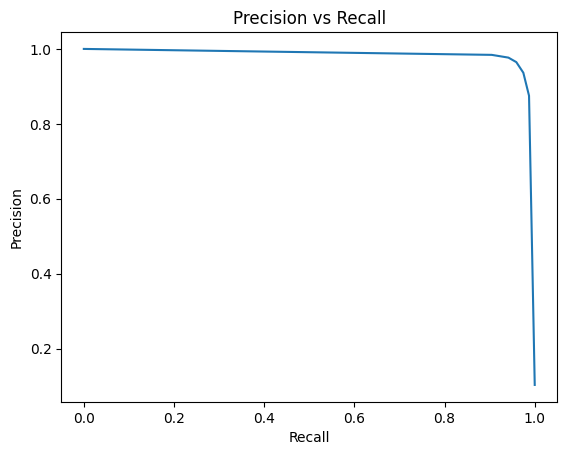

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

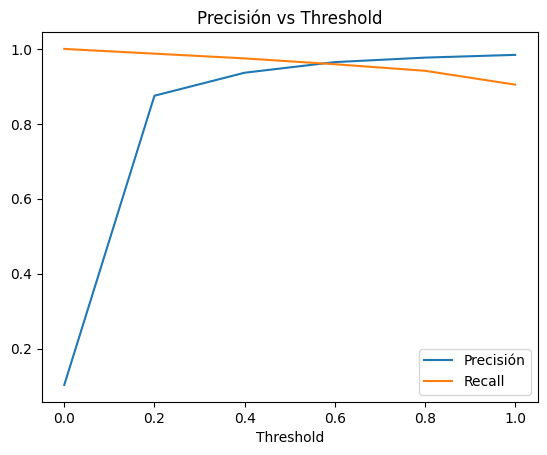

In [ ]:
# Graficar precisión vs threshold
plt.plot(thresholds, precision[:-1], label='Precisión')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precisión vs Threshold')
plt.legend()
plt.show()

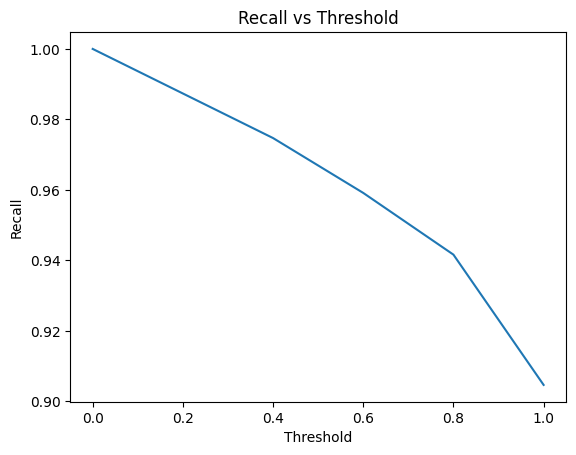

In [ ]:
# Graficar recall vs threshold
plt.plot(thresholds, recall[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')
plt.show()

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(test_labels, probs)
roc_auc = roc_auc_score(test_labels, probs)

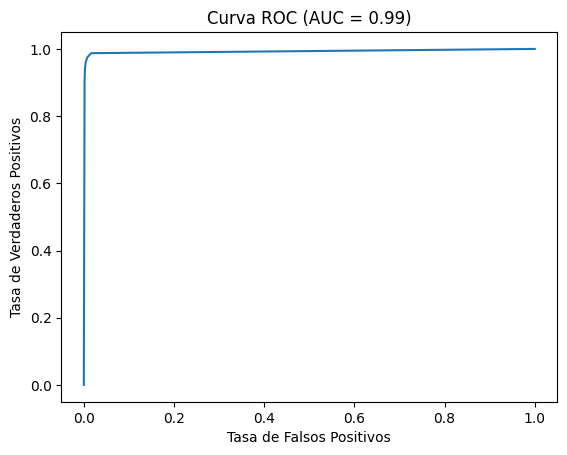

In [ ]:
# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.show()